In [1]:
import numpy as np

In [2]:
from utils import *
from transformations.single_object.transform_single_object import transform_single_object

## Input images

In [3]:
test_img_path = './data/IPPN_samples/ara1_rgb.png'
test_mask_path = './data/IPPN_samples/ara1_mask.png'

In [4]:
test_img = read(test_img_path)
test_mask = read(test_mask_path)

In [5]:
background = read('./data/background/soil_brown.jpg')

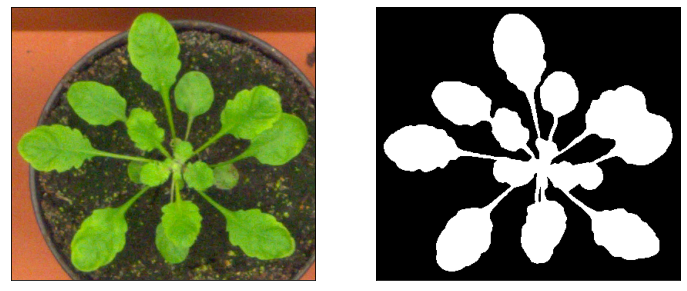

In [6]:
show([test_img, test_mask])

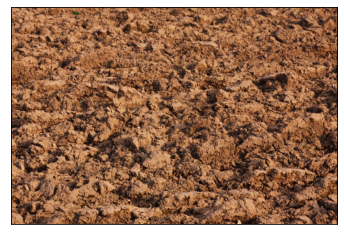

In [7]:
show(background)

## Examples

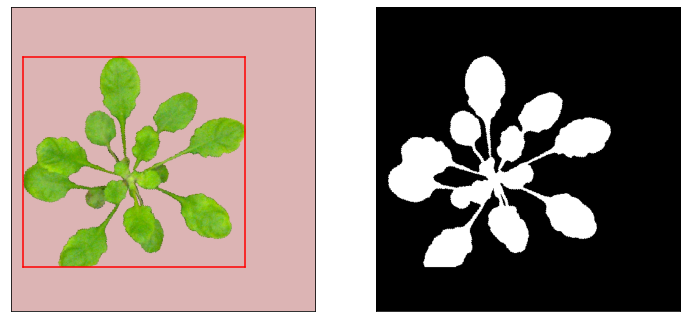

In [24]:
t_img, t_mask, bbox = transform_single_object(test_img, test_mask,
                        output_size_mode='fixed', output_size=[500, 500],
                        max_rotate_degree=30, flip_prob=0.5,
                        move=True,
                        background='img', background_image=(np.ones((500, 500, 3)) * np.array([220, 180, 180])).astype('uint8'),
                        persp_trans=0,
                        salt=0, pepper=0, gauss_var=0,
                        smooth_kernel_size=1)

show([t_img, t_mask], bbox)

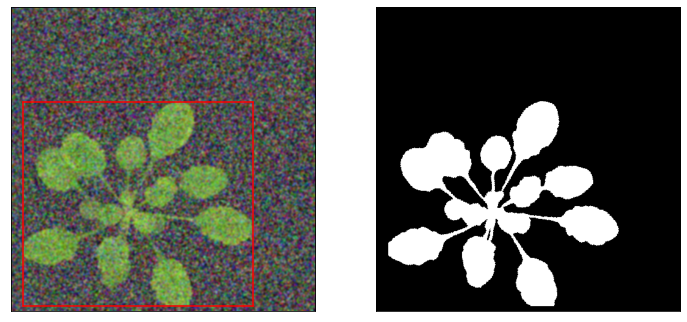

In [16]:
t_img, t_mask, bbox = transform_single_object(test_img, test_mask,
                        output_size_mode='fixed', output_size=[500, 500],
                        max_rotate_degree=30, flip_prob=0.5,
                        move=True,
                        background='none', background_image=background,
                        persp_trans=0,
                        salt=0.2, pepper=0.2, gauss_var=1e-4,
                        smooth_kernel_size=7)

show([t_img, t_mask], bbox)

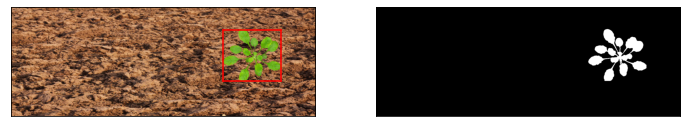

In [9]:
t_img, t_mask, bbox = transform_single_object(test_img, test_mask,
                        output_size_mode='multiplier', output_size=[1080, 1920], output_scale=(2, 5),
                        max_rotate_degree=30, flip_prob=0.5,
                        move=True,
                        background='img', background_image=background,
                        persp_trans=0,
                        salt=0, pepper=0, gauss_var=0,
                        smooth_kernel_size=1)

show([t_img, t_mask], bbox)

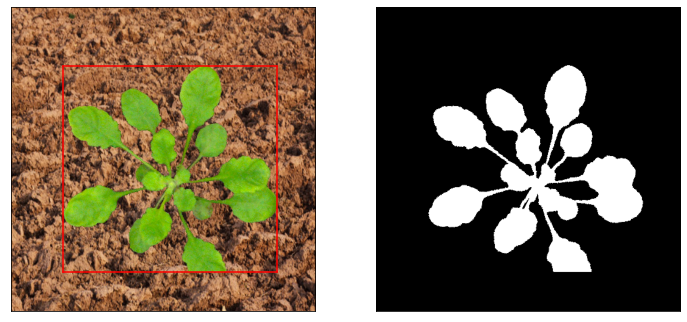

In [10]:
t_img, t_mask, bbox = transform_single_object(test_img, test_mask,
                        output_size_mode='fixed', output_size=[500, 500],
                        max_rotate_degree=30, flip_prob=0.5,
                        move=True,
                        background='img', background_image=background,
                        persp_trans=0,
                        salt=0, pepper=0, gauss_var=0,
                        smooth_kernel_size=1)

show([t_img, t_mask], bbox)

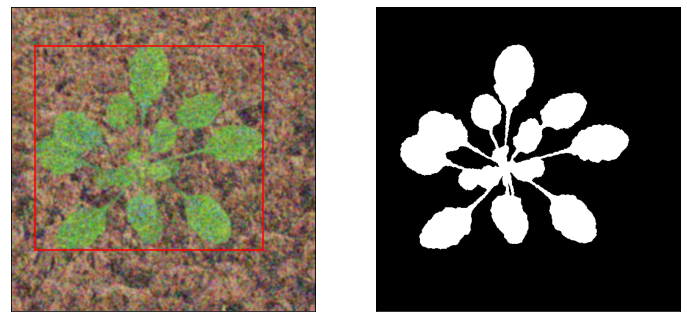

In [11]:
t_img, t_mask, bbox = transform_single_object(test_img, test_mask,
                        output_size_mode='fixed', output_size=[500, 500],
                        max_rotate_degree=30, flip_prob=0.5,
                        move=True,
                        background='img', background_image=background,
                        persp_trans=0,
                        salt=0.2, pepper=0.2, gauss_var=1e-3,
                        smooth_kernel_size=7)

show([t_img, t_mask], bbox)

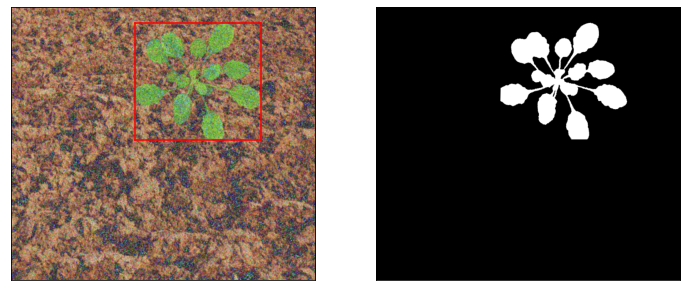

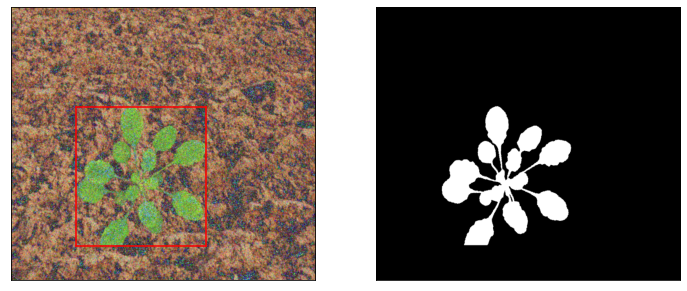

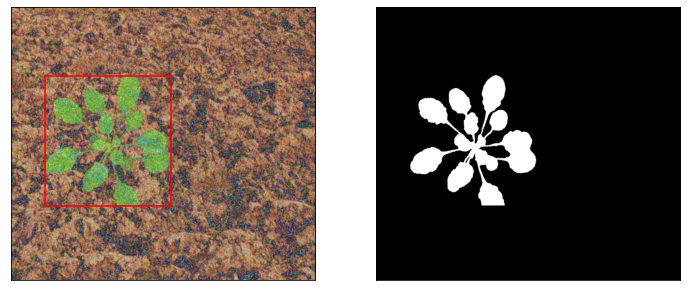

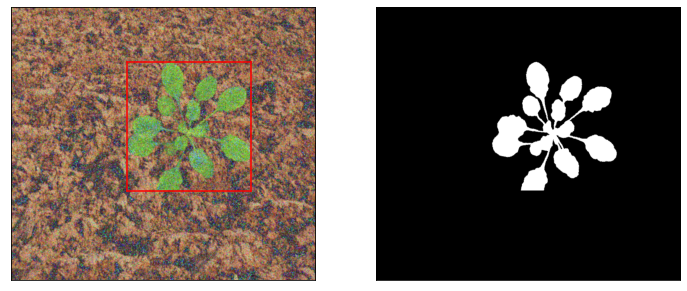

In [12]:
for i in range(4):
    t_img, t_mask, bbox = transform_single_object(test_img, test_mask,
                        output_size_mode='multiplier', output_size=[1080, 1920], output_scale=(2, 2),
                        max_rotate_degree=30, flip_prob=0.5,
                        move=True,
                        background='img', background_image=background,
                        persp_trans=0.2,
                        salt=0.1, pepper=0.1, gauss_var=1e-2,
                        smooth_kernel_size=3)

    show([t_img, t_mask], bbox)